In [1]:
import numpy as np
import matplotlib.pyplot as plt


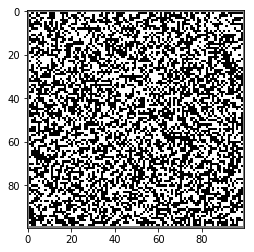

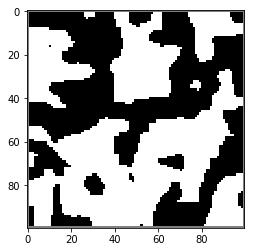

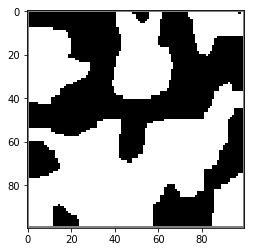

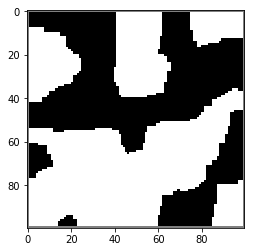

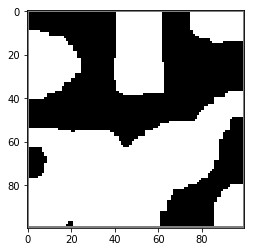

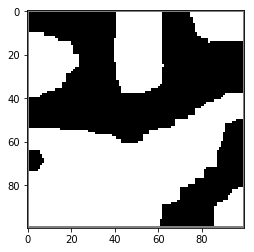

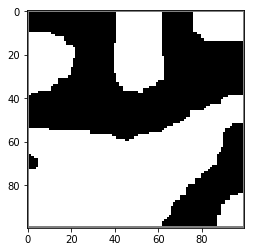

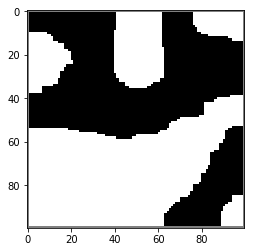

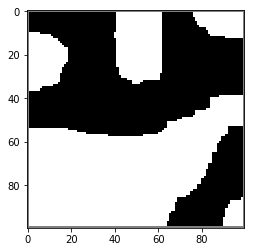

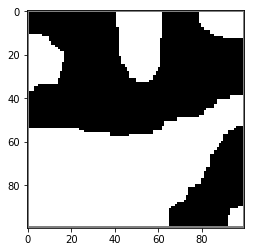

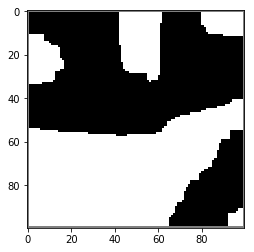

In [2]:

n_shape=100
shape=(n_shape,n_shape)
spin=np.random.choice([-1,1],size=shape)
spin[n_shape-1,:]=0
spin[0,:]=0
spin[:,n_shape-1]=0
spin[:,0]=0
spin_1=spin*1

T=1       #temperature
K=1.380*(pow(10, -23))  #boltzman const
J=1 #interaction const

def prob(E1,E2):                   #probability
    return np.exp((E2-E1)/(K*T))

def E(x,y):             #energy for paticle (hemiltonian)
    E = (-1*J)*(spin[x,y]*spin[x-1,y]+
                spin[x,y]*spin[x+1,y]+
                spin[x,y]*spin[x,y-1]+
                spin[x,y]*spin[x,y+1])
    return E

a=[]
b=[]
c=[]
for k in range(1,n_shape-1):
    a.append(k)
    b.append(k)
for t in range(n_shape-2):
    for tt in range(n_shape-2):
        c.append((a[t],b[tt]))


for j in range(100):
    np.random.shuffle(c)
    for i in range((n_shape-2)*(n_shape-2)):
        rnd1=np.random.random()
        c_=c[i]
        E1=E(c_[0],c_[1])
        spin[c_[0],c_[1]]=spin[c_[0],c_[1]]*(-1)  #스핀을바꾸고
        E2=E(c_[0],c_[1])
        if(E2-E1<=0):     #에너지가 낮아진다면
            spin[c_[0],c_[1]]=spin[c_[0],c_[1]]  #에너지를 낮추므로 바뀐채로 둔다
        if(E2-E1>0):        #에너지가 높아진다면
            if(rnd1<prob(E1,E2)):     #확률이 높다면
                spin[c_[0],c_[1]]=spin[c_[0],c_[1]]*(-1)   #바꾸지말고
            if(rnd1>prob(E1,E2)):     #확률이 낮다면
                spin[c_[0],c_[1]]=spin[c_[0],c_[1]]   #바꾼다
    globals()['spin_{}'.format(j+2)]=spin*1
    
for n in range(11):
    graph=plt.imshow(globals()['spin_{}'.format(n*10+1)],cmap='gray')
    plt.pause(0.01)